# Testing the Space-time Derivative Operator

Apply a space-time derivative operator to a space-time function:

$$\left(\frac{\partial}{\partial t}, \vec{\nabla}\right)(f, \vec{F}) = \left(\frac{\partial f}{\partial t} - \nabla \cdot F, \frac{\partial \vec{F}}{\partial t} + \vec{\nabla} f + \vec{\nabla} \times \vec{F}\right) \;.$$

There are 16 terms in all. A function will be created that does just that. The goal is to assure the created function is consistent with what happens in complex analysis.

Load the libraries.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

To derive the Maxwell equations, one needs to work with conjugates of the differential operator. One also needs to be able to write the differential operator on the right as well as the left, which flips the signs of the terms involved with the cross product. The function $\rm{Dq}()$ should be able to do this.

In [2]:
def Dq(q_1: Q, vars: List[sp.Symbol], these_vars: List[sp.Symbol] = None, conj: bool = False, conj_type: int=0, reverse: bool=False) -> Q:
    """
    Calculate the quaternion derivative composed of 16 terms. The conjugation applies to the differential operator. The reverse flag will flip the cross product terms.
    
    Args:
        q_1         A symbolic expression that returns a space-time number expression.
        vars        A complete list of what 4 symbols are being used.
        these_vars  An optional (possibly shorter) list of symbols to use to take a derivative.
        conj        If one wants to take a conjugate of the differential operator, set this option.
        conj_type   An integer for which term is positive, 0 the default for the standard conjugate.
                    The first, second, and third conjugates flip the other three, keeping the first, 
                    second, and third term positive
        
    Return:
        Q     The space-time derivative
    """
    
    end_q_type = f"D{q_1.q_type}"
    
    # Check for errors.
    if len(vars) != 4:
        print("Oops: needs to be given 4 symbols. Try again.")
        return q0()
    
    if not q_1.is_symbolic():
        print("Oops, the function needs to be symbolic.")
        return q0()
        
    if these_vars is None:
        these_vars = vars
        
    # Use the_D_signs to apply different conjugates to the differential operator D.
    D_signs = [1, 1, 1, 1]
    
    if conj:
        if conj_type == 0:
            D_signs = [1, -1, -1, -1]
        if conj_type == 1:
            D_signs = [-1, 1, -1, -1]
        if conj_type == 2:
            D_signs = [-1, -1, 1, -1]
        if conj_type == 3:
            D_signs = [-1, -1, -1, 1]
    
    the_16 = []
    
    for sign, var in enumerate(vars):
        if var in these_vars:
            the_16.append(sp.diff(D_signs[sign] * q_1.t, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.x, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.y, var))
            the_16.append(sp.diff(D_signs[sign] * q_1.z, var))
            
        else:
            for _ in range(4):
                the_16.append(0)

    flip = -1 if reverse else 1

    first_term =  the_16[0] - (the_16[5] + the_16[10] + the_16[15])
    second_term = the_16[1] + the_16[4] + flip * the_16[14] - flip * the_16[11]
    third_term =  the_16[2] + the_16[8] + flip * the_16[13] - flip * the_16[7]
    forth_term =  the_16[3] + the_16[12] + flip * the_16[6] - flip * the_16[9]
    
    return Q([first_term.simplify(), second_term.simplify(), third_term.simplify(), forth_term.simplify()], q_type=end_q_type)

Test that the function works on a complex-valued square funciton:

In [3]:
t, x, y, z = sp.symbols("t x y z")
q_tx = Q([t, x, 0, 0])
q_tx_2 = product(q_tx, q_tx)
q_tx_2.print_state("q_tx²")
print()
D_tx_2_dt = Dq(q_tx_2, [t, x, y, z], [t])
D_tx_2_dt.print_state("D_tx²_dt")
D_tx_2_dx = Dq(q_tx_2, [t, x, y, z], [x])
D_tx_2_dx.print_state("D_tx²_dx")
D_tx_2_dtdx = Dq(q_tx_2, [t, x, y, z], [t, x])
D_tx_2_dtdx.print_state("D_tx²_dtdx")


q_tx²
(t**2 - x**2, 2*t*x, 0, 0) 


D_tx²_dt
(2*t, 2*x, 0, 0) 

D_tx²_dx
(-2*t, -2*x, 0, 0) 

D_tx²_dtdx
(0, 0, 0, 0) 



Why is the derivative equal to zero? The square of a complex number is an analytic function in $z$. The space-time number derivative implements the Cauchy-Reimann equations:

$$(f, F_x) = (t^2 - x^2, 2 t x)$$

$$\frac{\partial f}{\partial t} -\frac{\partial F_x}{\partial x} = 0$$

$$\frac{\partial F_x}{\partial t} + \frac{\partial f}{\partial x} = 0$$

For this particular choice of function, the answer should be zero as it is.

What space-time numbers do is introduce 2 more imaginaries and no more scalars. This process necessarily adds some kinds of complications that need to be understood. See what happens if one takes the very same function, but makes it depend on two spatial dimensions.

In [4]:
q_txy = Q([t, x, y, 0])
q_txy_2 = product(q_txy, q_txy)
q_txy_2.print_state("q_txy²")
D_txy_2_dt = Dq(q_txy_2, [t, x, y, z], [t])
D_txy_2_dt.print_state("D_txy²_dt")
D_txy_2_dx = Dq(q_txy_2, [t, x, y, z], [x])
D_txy_2_dx.print_state("D_txy²_dx")
D_txy_2_dx = Dq(q_txy_2, [t, x, y, z], [y])
D_txy_2_dx.print_state("D_txy²_dy")
D_txy_2_dtdxdy = Dq(q_txy_2, [t, x, y, z], [t, x, y])
D_txy_2_dtdxdy.print_state("D_txy²_dtdx")

q_txy²
(t**2 - x**2 - y**2, 2*t*x, 2*t*y, 0) 

D_txy²_dt
(2*t, 2*x, 2*y, 0) 

D_txy²_dx
(-2*t, -2*x, 0, 0) 

D_txy²_dy
(-2*t, 0, -2*y, 0) 

D_txy²_dtdx
(-2*t, 0, 0, 0) 



What happens here is that the exact same scalar is subtracted twice, the $-2 t$ for the two imaginaries. The function goes from divergence-free to one with a divergence. There still is no curl terms because the differential operator points in the same direction as the function.

Why the difference for these space-time number functions? We need to think in terms of events in space-time, so it must be _animations_. The function $(t, x, 0, 0)^2$ can at most be a line moving about one dimension in space. How it moves of course will depend on what values of $t$ and $x$ going into it. For the function $(t, x, y, 0)^2$, that has at most an area moving around.

Recall, the derivative does not live in this base space of space-space time. The act of working with differential - subtracting two things - removes the role of the origin, putting the transformed information in a affine or tangent space. It provides information about how the base space is changing.

What convinced me there was no simple algebraic fix was looking at a cubic function:

In [5]:
q_txyz = Q([t, x, y, z])
q_txyz_3 = product(product(q_txyz, q_txyz), q_txyz)
q_txyz_3.print_state("q_txyz³")
D_txyz_3_dt = Dq(q_txyz_3, [t, x, y, z], [t])
D_txyz_3_dt.print_state("D_txyz³_dt")
D_txyz_3_dx = Dq(q_txyz_3, [t, x, y, z], [x])
D_txyz_3_dx.print_state("D_txyz³_dx")
D_txyz_3_dy = Dq(q_txyz_3, [t, x, y, z], [y])
D_txyz_3_dy.print_state("D_txyz³_dy")
D_txyz_3_dz = Dq(q_txyz_3, [t, x, y, z], [z])
D_txyz_3_dz.print_state("D_txyz³_dz")
D_txyz_3_dtdxdydz = Dq(q_txyz_3, [t, x, y, z])
D_txyz_3_dtdxdydz.print_state("D_txyx³_dtdxdydz")

q_txyz³
(-2*t*x**2 - 2*t*y**2 - 2*t*z**2 + t*(t**2 - x**2 - y**2 - z**2), 2*t**2*x + x*(t**2 - x**2 - y**2 - z**2), 2*t**2*y + y*(t**2 - x**2 - y**2 - z**2), 2*t**2*z + z*(t**2 - x**2 - y**2 - z**2)) 

D_txyz³_dt
(3*t**2 - 3*x**2 - 3*y**2 - 3*z**2, 6*t*x, 6*t*y, 6*t*z) 

D_txyz³_dx
(-3*t**2 + 3*x**2 + y**2 + z**2, -6*t*x, 2*x*z, -2*x*y) 

D_txyz³_dy
(-3*t**2 + x**2 + 3*y**2 + z**2, 2*y*z, -6*t*y, 2*x*y) 

D_txyz³_dz
(-3*t**2 + x**2 + y**2 + 3*z**2, -2*y*z, -2*x*z, -6*t*z) 

D_txyx³_dtdxdydz
(-6*t**2 + 2*x**2 + 2*y**2 + 2*z**2, 0, 0, 0) 



Now there are mixed terms, various products of $x$, $y$, and $z$. Cubic functions remain analytic for _complex_ values:

In [6]:
q_tx = Q([t, x, 0, 0])
q_tx_3 = product(product(q_tx, q_tx), q_tx)
q_tx_3.display_q("q_tx³")
D_tx_3_dt = Dq(q_tx_3, [t, x, y, z], [t])
D_tx_3_dt.display_q("D_txyz³_dt")
D_tx_3_dx = Dq(q_tx_3, [t, x, y, z], [x])
D_tx_3_dx.display_q("D_txyz³_dx")
D_tx_3_dy = Dq(q_tx_3, [t, x, y, z], [y])
D_tx_3_dy.print_state("D_txyz³_dy")
D_tx_3_dz = Dq(q_tx_3, [t, x, y, z], [z])
D_tx_3_dz.print_state("D_tx³_dz")
D_tx_3_dtdx = Dq(q_tx_3, [t, x, y, z], [t, x])
D_tx_3_dtdx.print_state("D_tx³_dtdx")

q_tx³


D_txyz³_dt


D_txyz³_dx


D_txyz³_dy
(0, 0, 0, 0) 

D_tx³_dz
(0, 0, 0, 0) 

D_tx³_dtdx
(0, 0, 0, 0) 



This remains a consistent theme: everything done in complex analysis is exactly mirrored with complex-valued space-time numbers. When more imaginaries are used, then the divergence of what are complex-valued analytic functions becomes non-zero. When the divergence is zero, one often says it is conservative, as in no energy is used for the pattern seen. Under that interpretation, a move from a complex analytic function to a full space-time number function involves the input or production of energy.

# Extend to a Space-time Number Series

Make sure there is a function that can take many derivatives.

In [7]:
def Dqs(q_1: Qs, vars: List[sp.Symbol], these_vars: List[sp.Symbol] = None, conj: bool = False, conj_type: int=0, reverse: bool=False) -> Qs:
    """
    Calculate the quaternion derivative composed of 16 terms. The conjugation applies to the differential operator. The reverse flag will flip the cross product terms.
    
    Args:
        q_1         Symbolic expressions that returns a space-time number expression in a space-time number series.
        vars        A complete list of what 4 symbols are being used.
        these_vars  An optional (possibly shorter) list of symbols to use to take a derivative.
        conj        If one wants to take a conjugate of the differential operator, set this option.
        conj_type   An integer for which term is positive, 0 the default for the standard conjugate.
                    The first, second, and third conjugates flip the other three, keeping the first, 
                    second, and third term positive
        
    Return:
        Q     The space-time derivative
    """
    
    results = [Dq(q, vars, these_vars, conj, conj_type, reverse) for q in q_1.qs]
    
    return Qs(results, qs_type=q_1.qs_type, rows=q_1.rows, columns=q_1.columns)

In [8]:
square_cube = Qs([q_tx_2, q_txyz_3])
Dqs(square_cube, [t, x, y, z]).display_q("derivatives of a quaternion series, square, cube")

derivatives of a quaternion series, square, cube
n=1



n=2


## Working with EM Potential Functions

In EM, one needs to work with potential functions. This section shows how to do that. We have a very specific goal. The Lorentz invariant quantity:

$$B^2 - E^2$$

is put in the Euler-Lagrange equations, and the result is both Gauss's law and Ampere's law. In a standard derivation one does a contraction of two rank-2 anti-symmetric tensors:

$$F^{\mu \nu} F_{\mu \nu} = B^2 - E^2$$

The field strength tensor $F^{\mu \nu}$ is a complicated structure, with each of the 6 EM fields sitting in their own isolated room. If one were to show the first equation to anyone with high school algebra, they would think that should be the result of a simple product:

$$B^2 - E^2 =?= (B + E)(B - E)$$

With the space-time number approach, both the $E$ and $B$ fields necessarily have 4 terms, but the first one happens to be zero for both. As has been my pattern in this library, if I brake a universal convention to make something a "space-time number" in terms of its algebraic qualities, I will add a \_q. Thus I work with $E\_q$ and $B\_q$.  The goal here is to get to:

$$(0, B - E)(-B -E) = (B^2 - E^2, 2 E \times B)$$

The first thing to do is define functions for sympy to use and define the EM potential

In [9]:
φ, Ax, Ay, Az = sp.Function("φ"), sp.Function("Ax"), sp.Function("Ay"), sp.Function("Az")

φ(t, x, y, z).diff(t)

In [10]:
EM_potential = Q([φ(t, x, y, z), Ax(t, x, y, z), Ay(t, x, y, z), Az(t, x, y, z)])
simpler = {φ(t, x, y, z): "φ", Ax(t, x, y, z): "Ax", Ay(t, x, y, z): "Ay", Az(t, x, y, z): "Az"}
EM_potential.subs(simpler).print_state("EM potential")

EM potential
(φ, Ax, Ay, Az) 



Take the space-time number derivative of the EM potential.

D EM_potential


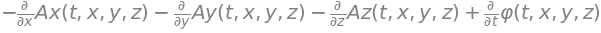

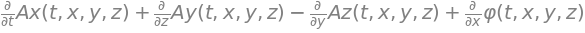

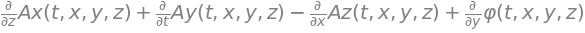

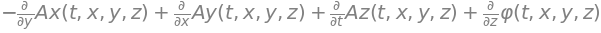

In [11]:
D_EM_potential = Dq(EM_potential, [t, x, y, z])
D_EM_potential.display_q("D EM_potential")

While this answer is correct, it has too many marks to be understood with ease. Create a list of substitutions that can do all the basic EM fields.

D EM_potential fields


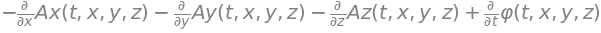

In [12]:
fields = {-Ax(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(x): "Ex", -Ay(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(y): "Ey", -Az(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(z): "Ez",
         Ay(𝑡,𝑥,𝑦,𝑧).diff(z)-Az(𝑡,𝑥,𝑦,𝑧).diff(y): "Bx", Ax(𝑡,𝑥,𝑦,𝑧).diff(z)-Az(𝑡,𝑥,𝑦,𝑧).diff(x): "By", Ay(𝑡,𝑥,𝑦,𝑧).diff(x)-Ax(𝑡,𝑥,𝑦,𝑧).diff(y): "Bz"}
D_EM_potential.subs(fields).display_q("D EM_potential fields")


The first term is a gauge field. For EM, that must be set to zero. I suspect this might be used for particles that are not photons. Such a link has not been created. Here we see the difference between the magnetic and electric fields Make the fields gauge-free.

In [13]:
gauge_free_EM = vector_q(D_EM_potential)
gauge_free_EM.subs(fields).display_q("gauge-free")

gauge-free


Take the derivative of the potential again, this time reversing the order of the differential and the potential. This will flip only the signs of the curl or $B\_q$ field.

In [14]:
gauge_free_ME = vector_q(Dq(EM_potential, [t, x, y, z], reverse=True))
gauge_free_ME.subs(fields).display_q("gauge-free reverse D")

gauge-free reverse D


In [21]:
EM_invariant_Poynting = product(gauge_free_EM, gauge_free_ME)
EM_invariant_Poynting.subs(fields).expand_q().display_q("EM invariant, Poynting")

EM invariant, Poynting


In [22]:
from sympy.calculus.euler import euler_equations

In [23]:
ρ, Jx, Jy, Jz = sp.symbols("ρ Jx Jy Jz")
current_density = Q([ρ, Jx, Jy, Jz])
current_potential = product(current_density, EM_potential)
current_potential.display_q("current_potential")

current_potential


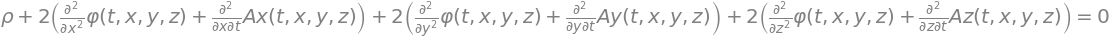

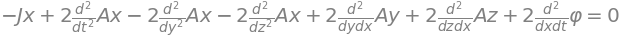

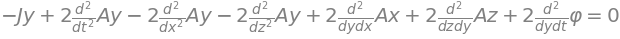

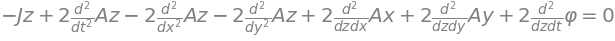

In [25]:
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , φ(t, x, y, z), [t, x, y, z])[0])
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Ax(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Ay(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Az(t, x, y, z), [t, x, y, z])[0].subs(simpler))

This is Gauss's law and Ampere's law at the core of EM.

# The Tests

In [26]:
class TestDq(unittest.TestCase):
    """Test states."""
    
    def test_Dq_derivative(self):
        T, X, Y, Z = sp.symbols("T X Y Z")
        TXYZ = [T, X, Y, Z]
            
        self.assertTrue(equal(Dq(q1(), TXYZ), q0()))
        self.assertTrue(equal(Dq(Q([T, X, Y, Z]), [T]), q0()))
        
        q_TX = Q([T, X, 0, 0])
        q_TX_3 = product(product(q_TX, q_TX), q_TX)
        D_q_TX_3 = Dq(q_TX, TXYZ)
        self.assertTrue(D_q_TX_3.t == 0)
        self.assertTrue(D_q_TX_3.x == 0)
        self.assertTrue(D_q_TX_3.y == 0)
        self.assertTrue(D_q_TX_3.z == 0)
        
        q_TXYZ = Q(TXYZ)
        q_TXYZ_3 = product(product(q_TXYZ, q_TXYZ), q_TXYZ)
        D_q_TXYZ_3 = Dq(q_TXYZ_3, TXYZ)
        self.assertTrue(D_q_TXYZ_3.t == -6*T**2 + 2*X**2 + 2*Y**2 + 2*Z**2)
        self.assertTrue(D_q_TXYZ_3.x ==  0)
        self.assertTrue(D_q_TXYZ_3.y ==  0)
        self.assertTrue(D_q_TXYZ_3.z ==  0)
        
    def test_Dqs_derivative(self):
        T, X, Y, Z = sp.symbols("T X Y Z")
        TXYZ = [T, X, Y, Z]
            
        self.assertTrue(equals(Dqs(Qs([q1()]), TXYZ), q0s()))
        self.assertTrue(equals(Dqs(Qs([Q([T, X, Y, Z])]), [T]), q0s()))
        
        q_TX = Q([T, X, 0, 0])
        q_TX_3 = product(product(q_TX, q_TX), q_TX)
        
        q_TXYZ = Q(TXYZ)
        q_TXYZ_3 = product(product(q_TXYZ, q_TXYZ), q_TXYZ)
        
        qs_TX_3_TXYZ_3 = Qs([q_TX_3, q_TXYZ_3])
        
        D_q_TX_3_TXYZ_3 = Dqs(qs_TX_3_TXYZ_3, TXYZ)
        
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[0].t == 0)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[0].x == 0)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[0].y == 0)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[0].z == 0)
        
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[1].t == -6*T**2 + 2*X**2 + 2*Y**2 + 2*Z**2)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[1].x ==  0)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[1].y ==  0)
        self.assertTrue(D_q_TX_3_TXYZ_3.qs[1].z ==  0)
        
suite = unittest.TestLoader().loadTestsFromModule(TestDq())
unittest.TextTestRunner().run(suite);

..

Oops, the function needs to be symbolic.
Oops: needs to be given 4 symbols. Try again.
Oops, the function needs to be symbolic.
Oops: needs to be given 4 symbols. Try again.



----------------------------------------------------------------------
Ran 2 tests in 0.120s

OK
